# Analysing River Discharge in Boulder Creek 1986-2013

**Aims:** 
* To compare daily average river discharge between the calendar months. 
* To determine monthly average river discharge of Boulder Creek between 1986 and 2013.

First import the python packages that will be used in this notebook.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore, norm

import scipy.stats

%matplotlib inline

Read the csv file containing the data.

In [2]:
df = pd.read_csv('../data/discharge/06730200-discharge-daily-1986-2013.csv')

Check the initial contents of the data.

In [3]:
 df.head()

,agency_cd,site_no,datetime,disValue,qualCode
0,USGS,6730200,10/1/86,30.0,A
1,USGS,6730200,10/2/86,30.0,A
2,USGS,6730200,10/3/86,30.0,A
3,USGS,6730200,10/4/86,30.0,A
4,USGS,6730200,10/5/86,30.0,A


Check what size the dataframe is. 

In [4]:
df.shape

(9954, 5)

The columns `datetime` and `disValue` obviously will have different values, but what about the other columns?

Explore the contents of each of the columns:

In [5]:
for column in ['agency_cd', 'site_no', 'qualCode']:
    print('Column {} has unique value(s) {}'.format(column, df[column].unique()))

Column agency_cd has unique value(s) ['USGS']
Column site_no has unique value(s) [6730200]
Column qualCode has unique value(s) ['A' 'A:e']


In this analysis, the columns above will be ignored.

In [6]:
df = df[['datetime', 'disValue']]

Check to see if there are any null values in the dataframe.

In [7]:
df.isnull().sum()

datetime    0
disValue    0
dtype: int64

Parse the `DATE` column of the dataframe.

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

Set the index of the dataframe to the `'datetime'` column.

In [9]:
df.set_index('datetime', inplace=True)

Display the summary statistics of the river discharge.

In [10]:
df['disValue'].describe()

count    9954.000000
mean       93.712645
std       143.942426
min         0.870000
25%        32.000000
50%        54.000000
75%       108.000000
max      4770.000000
Name: disValue, dtype: float64

Create a box plot of river discharge values, ignoring outliers.

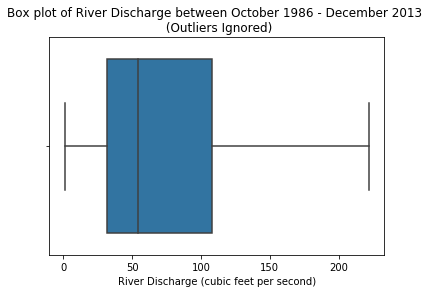

In [11]:
sns.boxplot(df['disValue'], showfliers=False)

plt.xlabel('River Discharge (cubic feet per second)')
plt.title('Box plot of River Discharge between October 1986 - December 2013 \n (Outliers Ignored)');

Plot a histogram of the daily discharge values.

/home/david/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


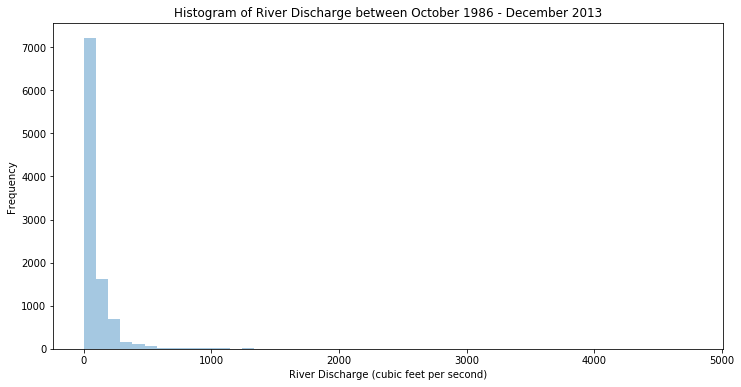

In [12]:
plt.figure(figsize=(12, 6));
sns.distplot(df['disValue'], kde=False)
plt.xlabel('River Discharge (cubic feet per second)')
plt.ylabel('Frequency')
plt.title('Histogram of River Discharge between October 1986 - December 2013');

The plot above is too dominated by outliers. As such, a plot of river discharge can created considering only values that are **below 3 standard deviation** from the mean.

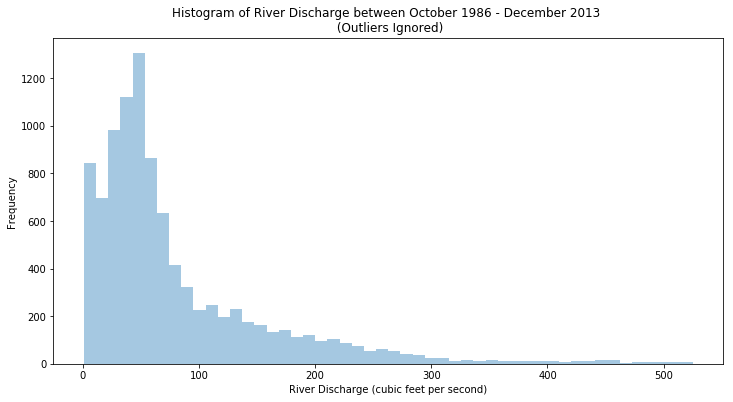

In [13]:
plt.figure(figsize=(12, 6));
sns.distplot(df[zscore(df['disValue']) < 3], kde=False)
plt.xlabel('River Discharge (cubic feet per second)')
plt.ylabel('Frequency')
plt.title('Histogram of River Discharge between October 1986 - December 2013 \n (Outliers Ignored)');

A plot of river discharge can created considering only values that are **above 3 standard deviation** from the mean. This will help to visualise the outliers.

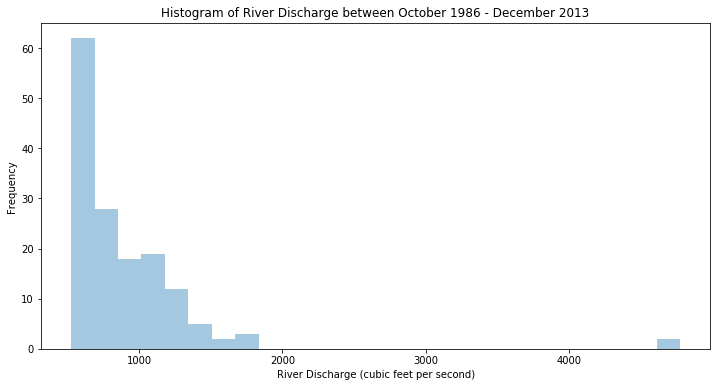

In [14]:
river_discharge_outliers = df[zscore(df['disValue']) > 3]

plt.figure(figsize=(12, 6));
sns.distplot(river_discharge_outliers, kde=False)

plt.xlabel('River Discharge (cubic feet per second)')
plt.ylabel('Frequency')
plt.title('Histogram of River Discharge between October 1986 - December 2013');

The percentage of river discharge recordings that lie above three standard deviations can be calculated:

In [15]:
percentage_outliers = (len(river_discharge_outliers)/len(df))*100

print('The percentage of recordings that are above three standard deviations from the mean is: {:.2f}%'.format(percentage_outliers))

The percentage of recordings that are above three standard deviations from the mean is: 1.52%


The most significant river discharge events can be determined. This can be done by grouping the outliers into Year-Month format, determining the mean in each group, then sorting them from high to low.

In [16]:
river_discharge_outliers.to_period('M').groupby('datetime').mean().sort_values(by='disValue', ascending=False)

,disValue
datetime,
2013-09,1624.714286
2003-05,1273.750000
1997-06,1057.272727
2003-06,975.333333
1995-06,945.520000
1999-08,887.000000
1995-05,866.818182
1993-06,806.000000
2011-07,750.812500


How does the daily average river discharge vary between the months of the year? To answer this question, a column called MONTH that explicitly records the month can be created.

In [17]:
df['MONTH'] = df.index.month

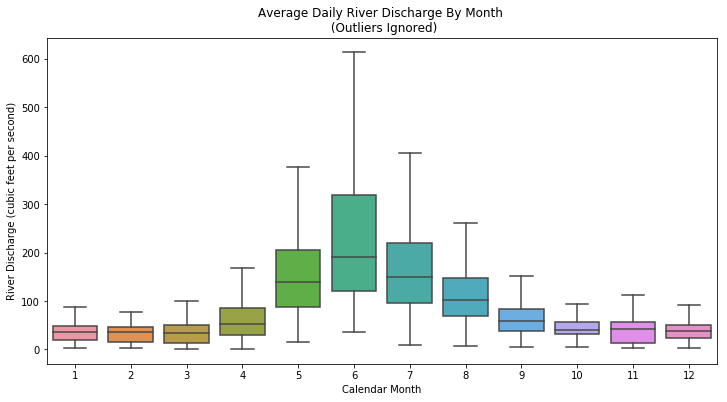

In [18]:
plt.figure(figsize=(12, 6));
sns.boxplot(data=df, x='MONTH', y='disValue', showfliers=False)

plt.xlabel('Calendar Month')
plt.ylabel('River Discharge (cubic feet per second)')
plt.title('Average Daily River Discharge By Month \n (Outliers Ignored)');

A new dataframe called `df_monthly` is created that resamples the river discharge by month and determines the mean of it. 

In [19]:
df_monthly = df.resample('M').mean()

Use seaborn to plot the mean river discharge by month.

/home/david/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


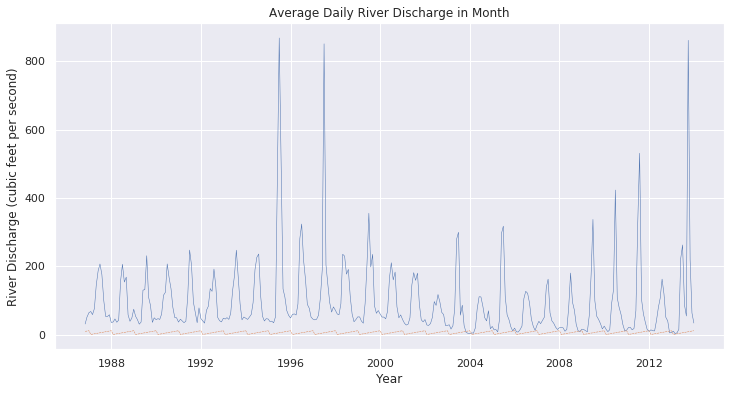

In [20]:
# decrease linewidth
sns.set(rc={"lines.linewidth": 0.5})

# increase plot size
plt.figure(figsize=(12, 6));

sns.lineplot(data=df_monthly, legend=False)
plt.xlabel('Year')
plt.ylabel('River Discharge (cubic feet per second)')
plt.title('Average Daily River Discharge in Month');

As can be seen, the graph shows a lot of variability in the flow in the creek by month. One can see the sharp peak that occurred during the September 2013 flood.
